In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

psi_grav = np.load("Simulation Runs//psiSlices400g0.0.npy")
psi_SI = np.load("Simulation Runs//psiSlices400g0.001.npy")

In [25]:
from PowerSpectrum import PowerSpectrum
from SchroPoissonSolver import Center

tshape = 5#np.shape(psi_grav)[0]
N = np.shape(psi_grav)[1]

spectra_grav = np.zeros((tshape , N-1))
spectra_SI = np.zeros((tshape , N-1))

for i in range(tshape):
    k_modes, spectra_grav[i, :] = PowerSpectrum((np.abs(psi_grav[i,:,:])**2))
    k_modes, spectra_SI[i, :] = PowerSpectrum((np.abs(psi_SI[i,:,:])**2))
    
avg_spectrum_grav = np.average(spectra_grav, axis=0)
avg_spectrum_SI = np.average(spectra_SI, axis=0)

In [58]:
avg_spectrum_grav = np.average(spectra_grav, axis=0)

avg_spectrum_SI = np.average(spectra_SI, axis=0)

def Gaussian(k, A, k0):
    return A*np.exp(-(k/k0)**2)

start = 220
end = 290

popt_grav, pcov_grav = curve_fit(Gaussian, k_modes[start:end], avg_spectrum_grav[start:end], [1e-5,30])
popt_SI, pcov_SI = curve_fit(Gaussian, k_modes[start:end],  avg_spectrum_SI[start:end], [1e-5,30])

print(popt_grav)
print(popt_SI)

[5.62149707e-04 2.20711298e+01]
[3.45690600e-04 2.07821547e+01]


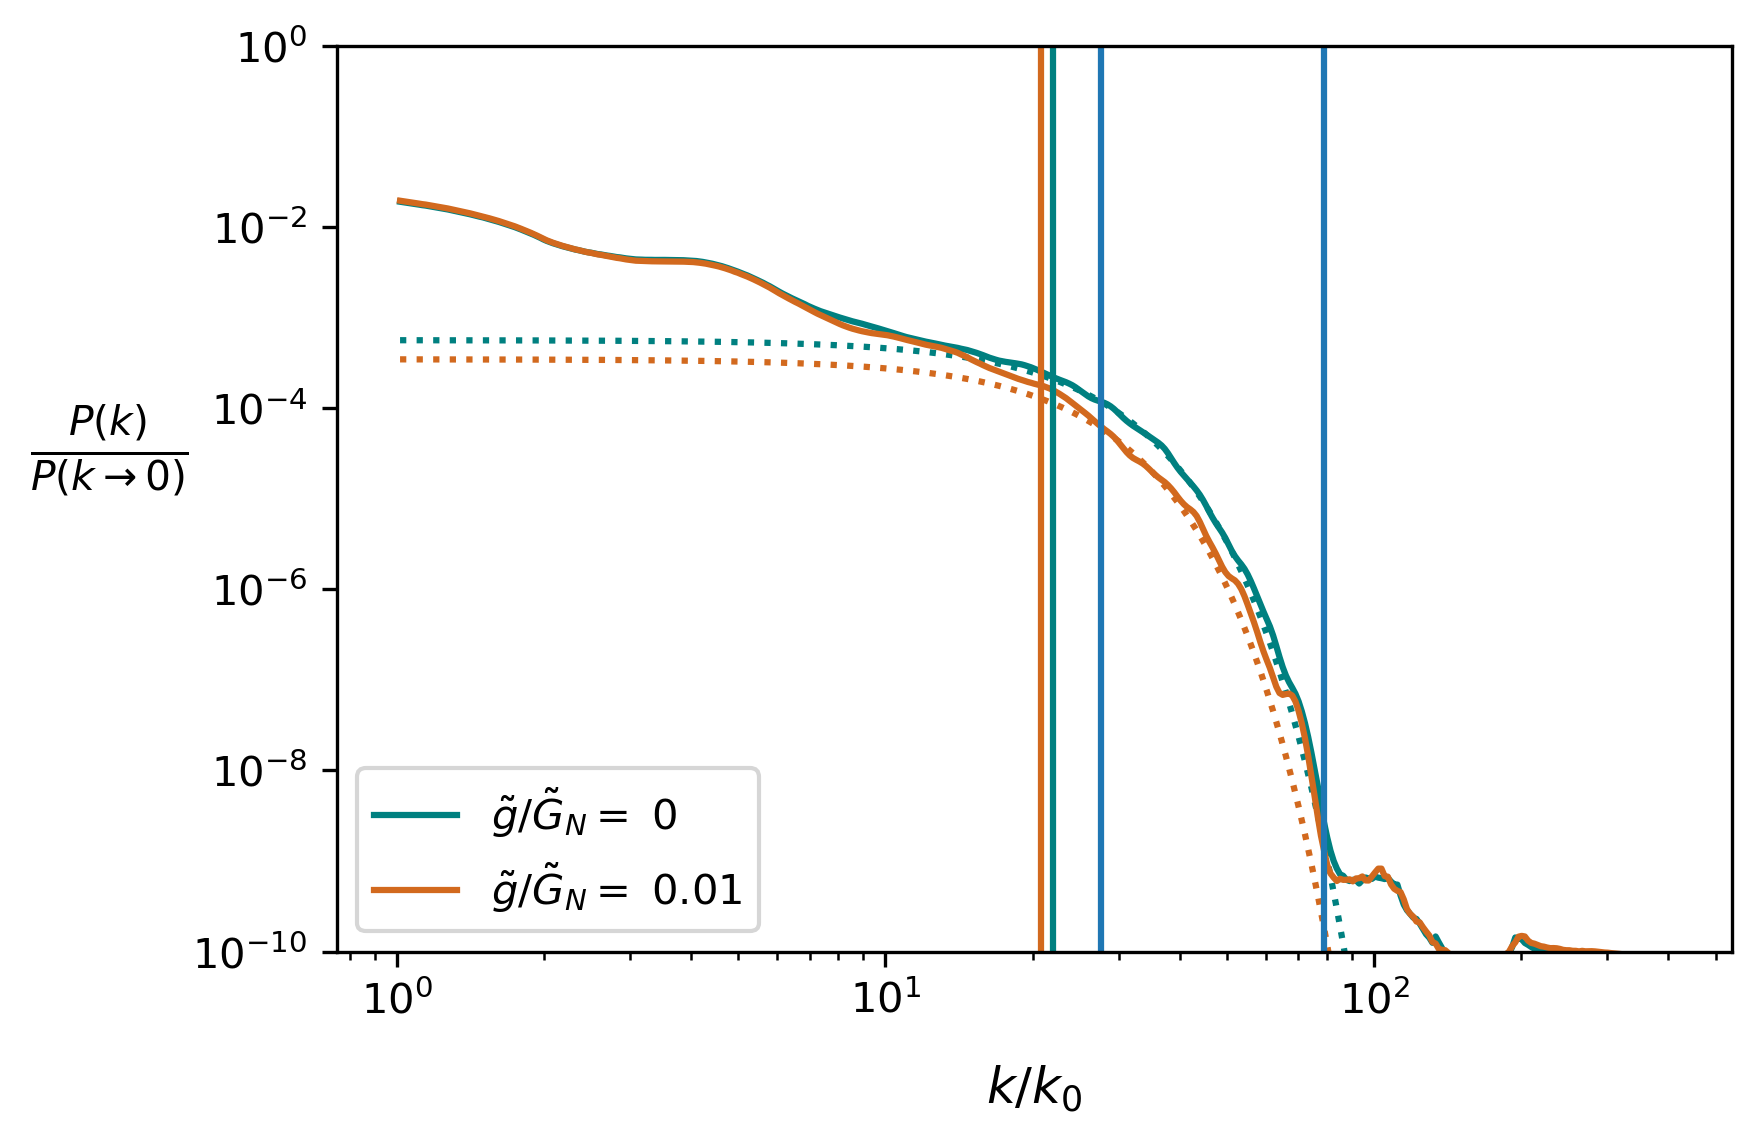

In [59]:
plt.figure(dpi = 300)
plt.xlabel(r"$k/k_{0}$", labelpad = 10, fontsize=12)
plt.ylabel(r"$\frac{P(k)}{P(k\rightarrow 0)}$", rotation = 0, labelpad = 20,fontsize=14 )
plt.loglog(k_modes, avg_spectrum_grav, label = r"$\tilde{g}/\tilde{G}_N=$ "+str(0),color="teal")
plt.loglog(k_modes, Gaussian(k_modes, popt_grav[0], popt_grav[1]),color="teal", linestyle=":")
plt.loglog(k_modes,avg_spectrum_SI, label = r"$\tilde{g}/\tilde{G}_N=$ "+str(0.01),color="chocolate")
plt.loglog(k_modes, Gaussian(k_modes, popt_SI[0], popt_SI[1]),color="chocolate", linestyle=":")
# plt.loglog(k_modes, k_modes**2*(avg_spectrum_grav-avg_spectrum_SI))
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.rcParams['axes.facecolor']='white'
plt.axvline(x=k_modes[start])
plt.axvline(x=k_modes[end])
plt.axvline(x=popt_grav[1], color="teal")
plt.axvline(x=popt_SI[1], color="chocolate")
# plt.axhline(y=np.max(k_modes[start:]**2*avg_spectrum_SI[start:]))
# plt.axvline(x=popt_grav[1], linestyle=":")
# plt.axhline(y=avg_spectrum_grav[int(popt_grav[1])])
# plt.axvline(x=85)
# plt.xlim(k_modes[start], k_modes[end])
plt.ylim(1e-10,1e0)
# plt.xlim(0,10)
plt.legend()
plt.savefig("example-spectrum.png",bbox_inches="tight",facecolor="white")
plt.show()

In [57]:
s1 = np.sum(avg_spectrum_grav[start:])
s2 = np.sum(avg_spectrum_SI[start:])
diff = s2-s1
dk = k_modes[start]-k_modes[-1]

print(diff/s1)
print(avg_spectrum_grav[67])
print((avg_spectrum_grav[start]-avg_spectrum_SI[start])/1)

0.011921853441940215
0.005823969822902543
-4.3246068904037436e-07


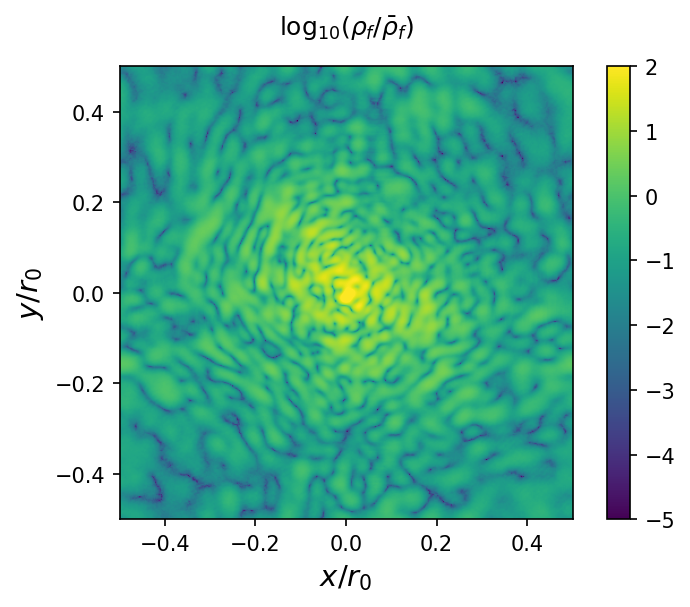

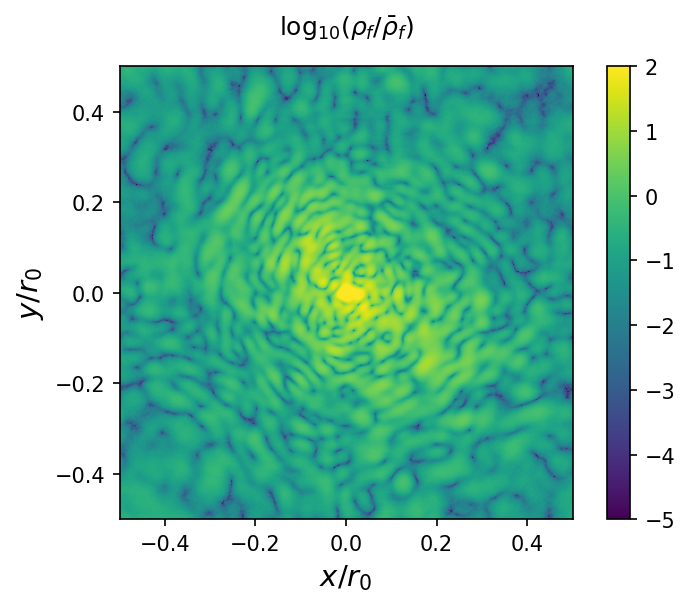

In [19]:


rho_centered_grav = Center(np.abs(psi_grav[-1,:,:])**2)
rho_centered_SI = Center(np.abs(psi_SI[-1,:,:])**2)
scale = 1

plt.figure(dpi=150)
# plt.title(r"$\log_{10}|\psi_f|^2$")
plt.rcParams['axes.facecolor']='white'
plt.title(r"$\log_{10}(\rho_f/\bar{\rho}_f)$", pad = 15)
# plt.imshow((rho_centered), extent=[-scale/2, scale/2, -scale/2, scale/2])#, cmap = "inferno")
plt.imshow(np.log10((rho_centered_grav)/np.average(rho_centered_grav)), extent=[-scale/2, scale/2, -scale/2, scale/2])#, cmap = "inferno")
# plt.plot(halfway, halfway, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red", zorder=1)
plt.colorbar()
plt.clim(-5, 2)
plt.rcParams['axes.facecolor']='white'
plt.xlabel(r"$x/r_0}$", fontsize=14)
plt.ylabel(r"$y/r_{0}$", fontsize=14)
# plt.savefig("Sim-f"+str(resolution)+"g"+str(g_SI/G_N)+".png", facecolor="white", bbox_inches="tight")
plt.show()

plt.figure(dpi=150)
# plt.title(r"$\log_{10}|\psi_f|^2$")
plt.rcParams['axes.facecolor']='white'
plt.title(r"$\log_{10}(\rho_f/\bar{\rho}_f)$", pad = 15)
# plt.imshow((rho_centered), extent=[-scale/2, scale/2, -scale/2, scale/2])#, cmap = "inferno")
plt.imshow(np.log10((rho_centered_SI)/np.average(rho_centered_SI)), extent=[-scale/2, scale/2, -scale/2, scale/2])#, cmap = "inferno")
# plt.plot(halfway, halfway, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red", zorder=1)
plt.colorbar()
plt.clim(-5, 2)
plt.rcParams['axes.facecolor']='white'
plt.xlabel(r"$x/r_0}$", fontsize=14)
plt.ylabel(r"$y/r_{0}$", fontsize=14)
# plt.savefig("Sim-f"+str(resolution)+"g"+str(g_SI/G_N)+".png", facecolor="white", bbox_inches="tight")
plt.show()

<ipython-input-20-809effb29790>:4: RuntimeWarning: overflow encountered in power
  return A *v* np.exp(- (v/sigma)**n)


[6.08623084e+05 5.31652971e-02 8.49751012e-01]
v_rms = 0.8844392975192666
v_peak = 0.06951426087540408
sigma_v = 0.7941257101453949


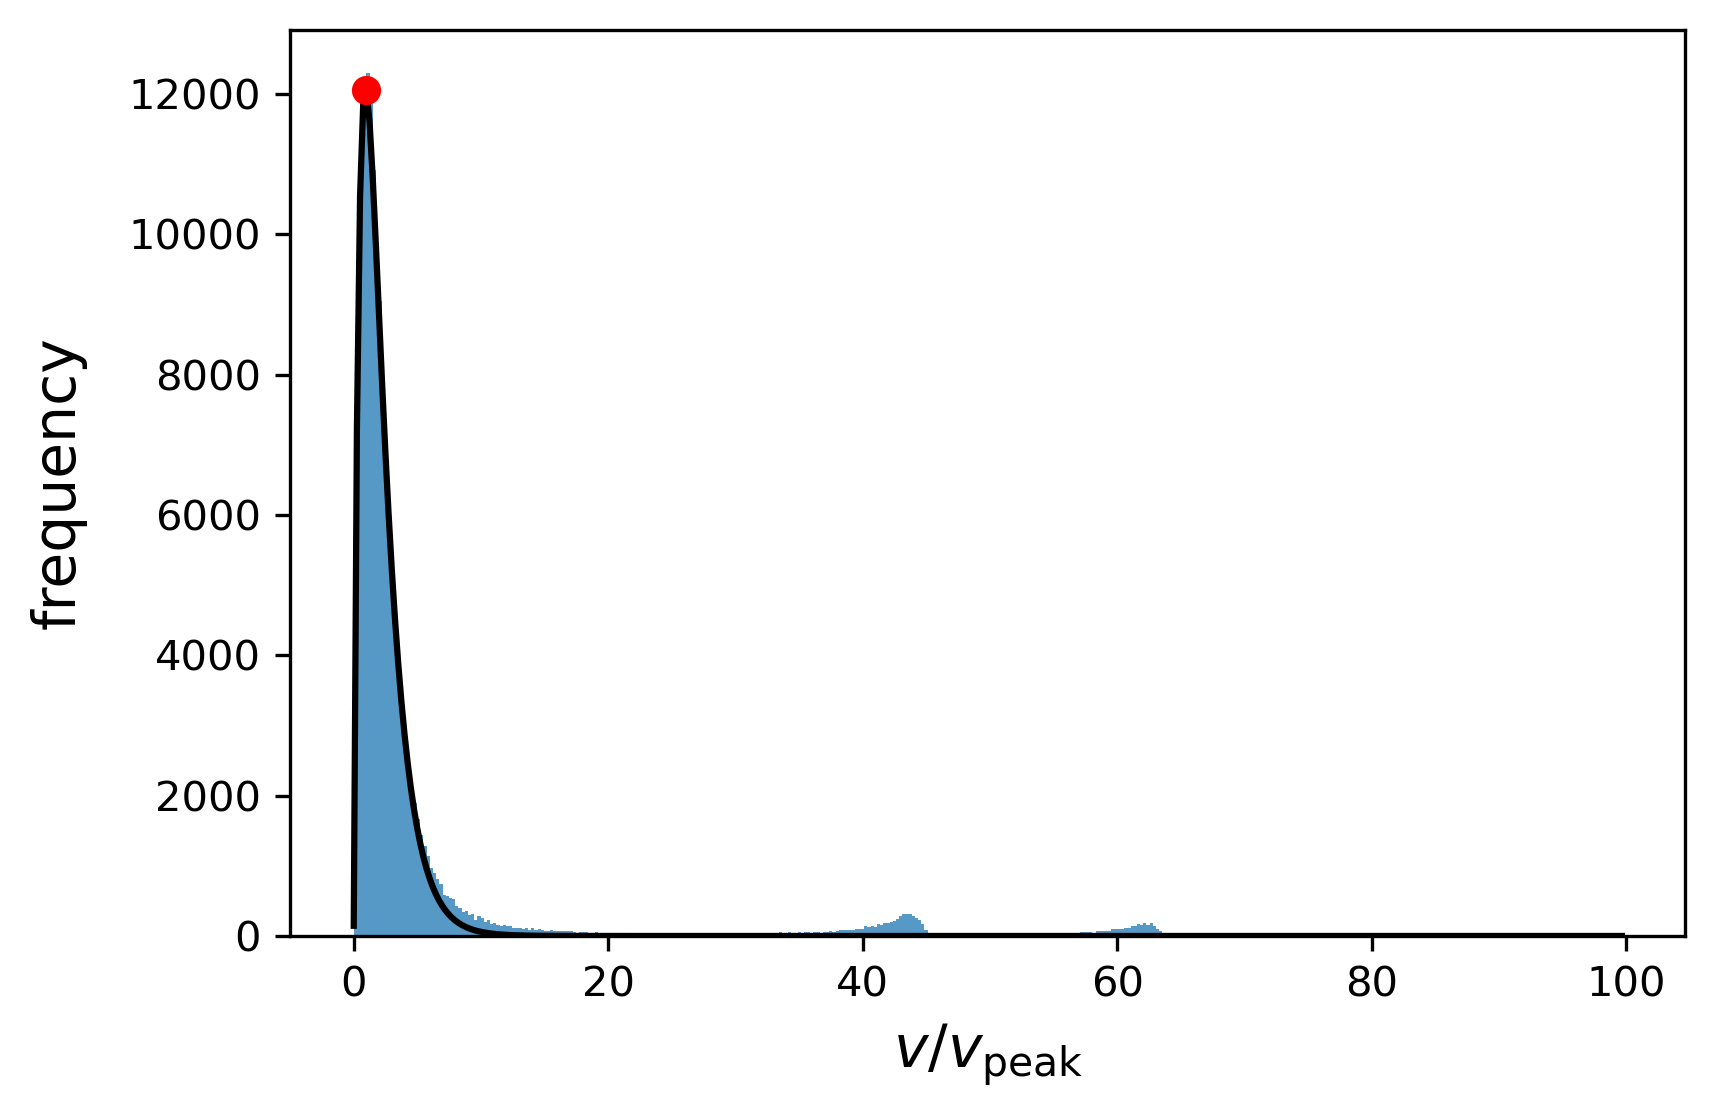

In [20]:
from scipy.optimize import curve_fit

def Maxwell(v , A, sigma, n):
    return A *v* np.exp(- (v/sigma)**n)

phase = np.angle(psi_grav[-1,:,:])
v_y, v_x = np.gradient(phase)


v_mag = np.linalg.norm(np.gradient(phase), axis=0)
v_mag2 = v_mag**2

hist, bins = np.histogram(v_mag, bins=int(N**1.))


v_peak = bins[np.argmax(hist)]

v_rms = np.sqrt(np.average(v_mag2))

cut = 400 # index up to which to do curve fit

popt, pcov = curve_fit(Maxwell, bins[1:cut], hist[1:cut], [1000, v_peak, 2])
Dist = Maxwell(bins, popt[0], popt[1], popt[2])
v_peak = bins[np.argmax(Dist)]
sigma_v = np.std(v_mag[:cut])

# v_peak = popt[1]

print(popt)

# plt.figure(dpi=150, figsize=(4,4))
# plt.imshow(v_mag)#,   cmap="gray")
# plt.axis("equal")
# plt.show()

print("v_rms = "+str(v_rms))
print("v_peak = "+str(v_peak))
print("sigma_v = "+str(sigma_v))



plt.figure(dpi=300)
plt.rcParams['axes.facecolor']='white'
plt.hist(v_mag.ravel()/v_peak, bins=int(N**1.), log=False, alpha=0.75)
plt.plot(bins/v_peak, Dist, color="k")
plt.xlabel(r"$v/v_{\mathrm{peak}}$", fontsize=14)
plt.ylabel("frequency", fontsize=14, labelpad=10)
# plt.axvline(x=1, zorder=2, label = "RMS", color = "k", linestyle = "--")
# plt.axvline(x=np.median(v_mag)/v_rms, label = "Median", color='r', linestyle = "--")
# plt.axvline(x=np.mean(v_mag)/v_rms, label = "Mean", color = "g", linestyle = "--")
# plt.axvline(x=v_peak/v_peak, color="red")
# plt.legend()
# plt.xlim(0,6)
# plt.savefig("v-dist"+str(resolution)+"g"+str(g_SI/G_N)+".png", bbox_inches="tight")
# plt.axvline(x=1-(sigma_v/v_peak)/2, color="k", linestyle=":")
# plt.axvline(x=1+(sigma_v/v_peak)/2, color="k", linestyle=":")
# plt.scatter(v_peak/v_peak, hist[np.argmax(hist)], color="red", zorder=3)
plt.scatter(1, np.max(Dist), color="red", zorder=4)
# plt.axvline(x = bins[cut]/v_peak)
# plt.savefig("speed-dist"+str(resolution)+"g"+str(g_SI/G_N)+".png", bbox_inches="tight", facecolor="white")
# plt.xlim(0,40)
plt.show()

<ipython-input-20-809effb29790>:4: RuntimeWarning: overflow encountered in power
  return A *v* np.exp(- (v/sigma)**n)


[4.81178045e+05 6.90808774e-02 9.75924066e-01]
v_rms = 0.8803333711261637
v_peak = 0.06950420946303543
sigma_v = 0.7903346234456922


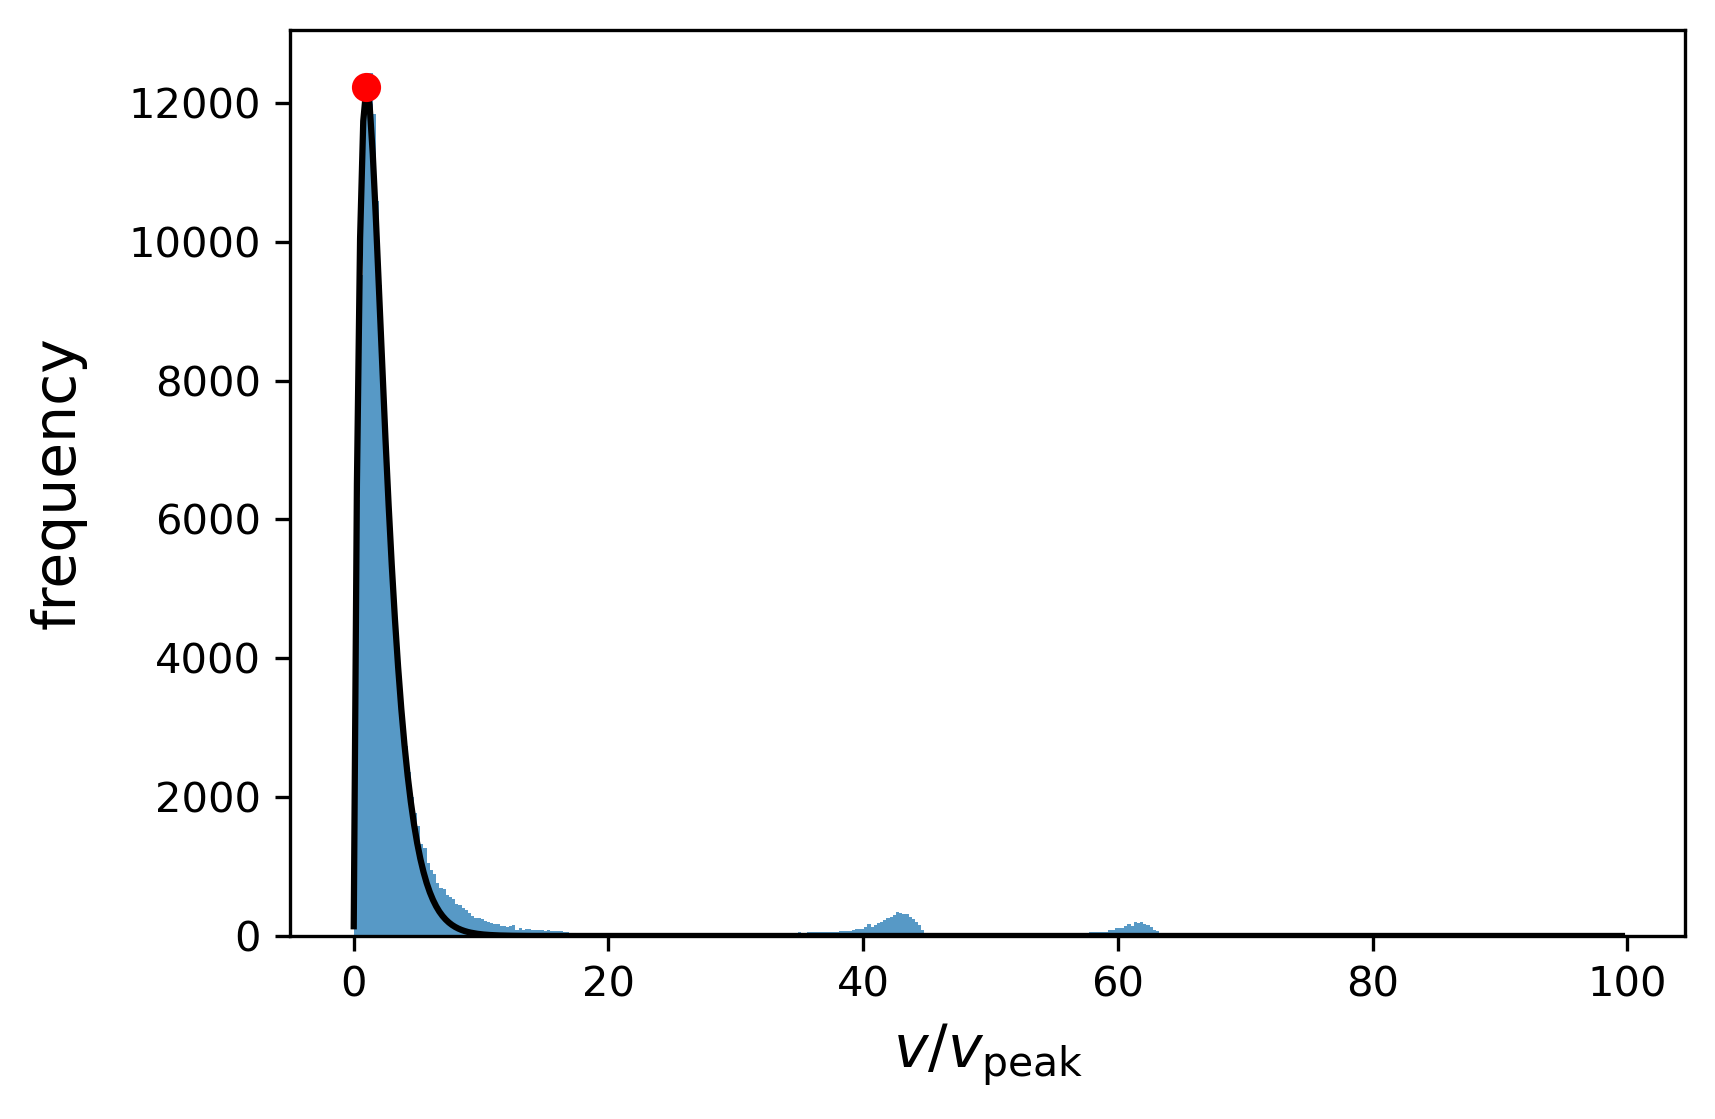

In [21]:
phase = np.angle(psi_SI[-1,:,:])
v_y, v_x = np.gradient(phase)


v_mag = np.linalg.norm(np.gradient(phase), axis=0)
v_mag2 = v_mag**2

hist, bins = np.histogram(v_mag, bins=int(N**1.))


v_peak = bins[np.argmax(hist)]

v_rms = np.sqrt(np.average(v_mag2))

cut = 400 # index up to which to do curve fit

popt, pcov = curve_fit(Maxwell, bins[1:cut], hist[1:cut], [1000, v_peak, 2])
Dist = Maxwell(bins, popt[0], popt[1], popt[2])
v_peak = bins[np.argmax(Dist)]
sigma_v = np.std(v_mag[:cut])

# v_peak = popt[1]

print(popt)

# plt.figure(dpi=150, figsize=(4,4))
# plt.imshow(v_mag)#,   cmap="gray")
# plt.axis("equal")
# plt.show()

print("v_rms = "+str(v_rms))
print("v_peak = "+str(v_peak))
print("sigma_v = "+str(sigma_v))



plt.figure(dpi=300)
plt.rcParams['axes.facecolor']='white'
plt.hist(v_mag.ravel()/v_peak, bins=int(N**1.), log=False, alpha=0.75)
plt.plot(bins/v_peak, Dist, color="k")
plt.xlabel(r"$v/v_{\mathrm{peak}}$", fontsize=14)
plt.ylabel("frequency", fontsize=14, labelpad=10)
# plt.axvline(x=1, zorder=2, label = "RMS", color = "k", linestyle = "--")
# plt.axvline(x=np.median(v_mag)/v_rms, label = "Median", color='r', linestyle = "--")
# plt.axvline(x=np.mean(v_mag)/v_rms, label = "Mean", color = "g", linestyle = "--")
# plt.axvline(x=v_peak/v_peak, color="red")
# plt.legend()
# plt.xlim(0,6)
# plt.savefig("v-dist"+str(resolution)+"g"+str(g_SI/G_N)+".png", bbox_inches="tight")
# plt.axvline(x=1-(sigma_v/v_peak)/2, color="k", linestyle=":")
# plt.axvline(x=1+(sigma_v/v_peak)/2, color="k", linestyle=":")
# plt.scatter(v_peak/v_peak, hist[np.argmax(hist)], color="red", zorder=3)
plt.scatter(1, np.max(Dist), color="red", zorder=4)
# plt.axvline(x = bins[cut]/v_peak)
# plt.savefig("speed-dist"+str(resolution)+"g"+str(g_SI/G_N)+".png", bbox_inches="tight", facecolor="white")
# plt.xlim(0,40)
plt.show()